In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
%autosave 0 

Autosave disabled


In [2]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=[['Path_vit']]
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))



In [3]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [4]:
fast_load=True


if fast_load:
    datamugroso=pd.read_csv('pddata.csv')
    data= datamugroso.iloc[:,1:].sample(n=8000,axis=0)
    #lecs=data[data.Vk==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

lecs=data.iloc[:,:-6]

In [5]:
data.describe()


,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Vk_aff,Y,Vk
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.862362,1.860836,1.858418,1.853026,1.836335,1.818742,1.813720,1.816526,1.791819,1.775420,...,1.767349,1.777246,1.791085,1.794204,1.584747,1.959985,0.049234,189.957625,14.308875,56.074750
std,1.001532,1.004120,1.007238,1.007939,0.996753,0.977254,0.979022,0.988347,0.958402,0.939004,...,0.985287,0.996075,1.013744,1.015163,0.856562,1.355786,1.832366,106.522206,9.204907,38.155303
min,0.253752,0.252573,0.251412,0.250271,0.249148,0.248044,0.246958,0.245890,0.244839,0.243805,...,0.249102,0.250459,0.251839,0.253243,-0.806763,-0.246084,-3.140742,0.000000,0.000000,0.000000
25%,1.074655,1.071729,1.067492,1.062222,1.058460,1.059381,1.055438,1.052258,1.053275,1.049799,...,1.035574,1.041418,1.045986,1.048436,0.896347,0.723752,-1.650458,101.000000,6.000000,18.000000
50%,1.651425,1.642815,1.635277,1.629224,1.625027,1.624495,1.612998,1.609112,1.603080,1.600581,...,1.634671,1.639902,1.646672,1.651237,1.859047,1.863258,0.307716,195.000000,14.000000,53.000000
75%,2.306100,2.291981,2.276993,2.263144,2.237138,2.223870,2.222354,2.224392,2.198833,2.178131,...,2.152326,2.166172,2.173711,2.178712,2.288290,3.289327,1.587945,278.000000,22.000000,89.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,3.264953,4.302407,3.141498,371.000000,31.000000,127.000000


In [6]:
lecs=np.clip(lecs,0,5)
data.iloc[:,:-6]=lecs

In [7]:
data.describe()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Vk_aff,Y,Vk
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.862362,1.860836,1.858418,1.853026,1.836335,1.818742,1.813720,1.816526,1.791819,1.775420,...,1.767349,1.777246,1.791085,1.794204,1.584747,1.959985,0.049234,189.957625,14.308875,56.074750
std,1.001532,1.004120,1.007238,1.007939,0.996753,0.977254,0.979022,0.988347,0.958402,0.939004,...,0.985287,0.996075,1.013744,1.015163,0.856562,1.355786,1.832366,106.522206,9.204907,38.155303
min,0.253752,0.252573,0.251412,0.250271,0.249148,0.248044,0.246958,0.245890,0.244839,0.243805,...,0.249102,0.250459,0.251839,0.253243,-0.806763,-0.246084,-3.140742,0.000000,0.000000,0.000000
25%,1.074655,1.071729,1.067492,1.062222,1.058460,1.059381,1.055438,1.052258,1.053275,1.049799,...,1.035574,1.041418,1.045986,1.048436,0.896347,0.723752,-1.650458,101.000000,6.000000,18.000000
50%,1.651425,1.642815,1.635277,1.629224,1.625027,1.624495,1.612998,1.609112,1.603080,1.600581,...,1.634671,1.639902,1.646672,1.651237,1.859047,1.863258,0.307716,195.000000,14.000000,53.000000
75%,2.306100,2.291981,2.276993,2.263144,2.237138,2.223870,2.222354,2.224392,2.198833,2.178131,...,2.152326,2.166172,2.173711,2.178712,2.288290,3.289327,1.587945,278.000000,22.000000,89.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,3.264953,4.302407,3.141498,371.000000,31.000000,127.000000


In [8]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
#from sklearn.cluster import OPTICS

In [14]:
af = AffinityPropagation(damping=.8).fit(lecs)
#db=DBSCAN().fit(lecs)

/home/oscar/py3/lib/python3.6/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


In [15]:
data['Vk_aff']=af.labels_
ccvk_aff= af.cluster_centers_

In [16]:
data[['Vk','Vk_aff']]

,Vk,Vk_aff
11689,56,209
38871,22,303
37961,79,320
39191,102,0
14236,12,139
...,...,...
37818,73,67
10557,113,114
2383,41,11
29333,106,201


Text(0.5, 0.98, 'Affinity Prop')

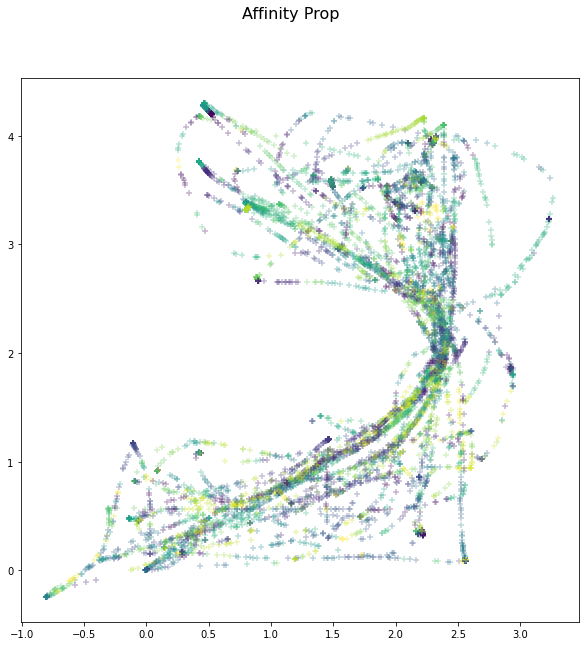

In [17]:
ccvk=np.load('ccvk.npy')
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk_aff,alpha=.313)
fig.suptitle('Affinity Prop', fontsize=16)




#cords3=path_to_xy(np.arange(0,len(cc)),cc)
#ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')




In [18]:
data.Vk_aff.value_counts().index[1] 


120

In [19]:
#index_forlec=data.Vk_aff.value_counts().iloc[1]
lec_aff_leida= data.Vk_aff.value_counts().index[1]
lec=data[data.Vk_aff==lec_aff_leida].iloc[0,:-6].values

#lec_Kmn_leida= data.Vk.value_counts().index[1]

#lec=data.iloc[index_forlec,:-6].values
lec_Kmn_leida=np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
lec_Kmn_leida,lec_aff_leida



(9, 120)

In [20]:
#lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


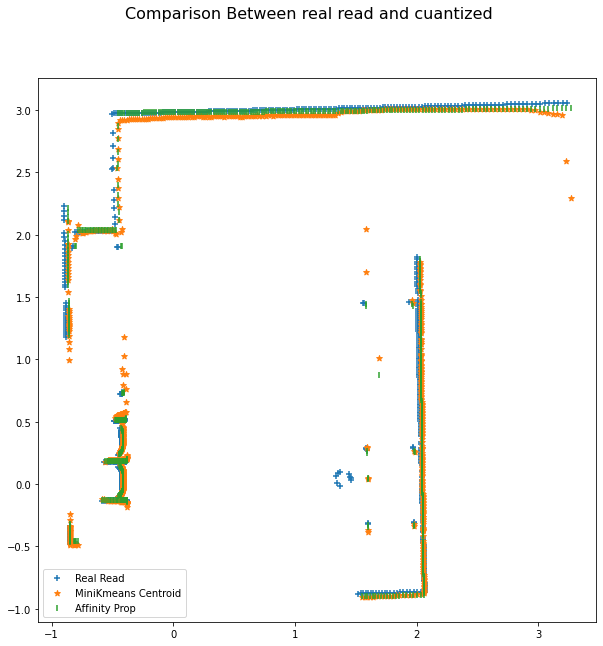

In [21]:
#ccvk=cc
cc=ccvk
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
#print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
#vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
vec_obs_aff=ccvk_aff[lec_aff_leida]
vec_obs=cc[lec_Kmn_leida]

cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs_aff
CORDS['xx'],CORDS['yy']=cordsx,cordsy
cordsy, cordsx= np.cos(angs) *  vec_obs_aff ,  np.sin(angs) *  vec_obs_aff
CORDS['xxx'],CORDS['yyy']=cordsx,cordsy

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+' , label= 'Real Read')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label= 'MiniKmeans Centroid')
ax1.scatter(x=CORDS.xxx,y=CORDS.yyy,marker='|', label= 'Affinity Prop')
ax1.legend()

In [22]:
lec_aff_leida= data.Vk_aff.value_counts().index[25]
print (lec_aff_leida)

265


In [23]:
#index_forlec=data.Vk_aff.value_counts().iloc[1]
lec=data[data.Vk_aff==lec_aff_leida].iloc[0,:-6].values

lec_Kmn_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()

#lec=data.iloc[index_forlec,:-6].values

#vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]

print(lec_aff_leida, lec_Kmn_leida)

265 67


In [24]:
#lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


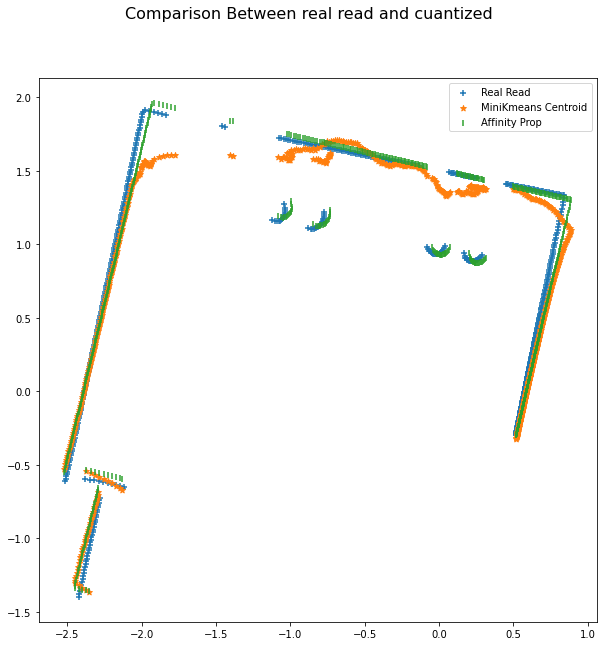

In [25]:
#ccvk=cc
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
#print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
#vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
vec_obs_aff=ccvk_aff[lec_aff_leida]
vec_obs=cc[lec_Kmn_leida]

cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs_aff
CORDS['xx'],CORDS['yy']=cordsx,cordsy
cordsy, cordsx= np.cos(angs) *  vec_obs_aff ,  np.sin(angs) *  vec_obs_aff
CORDS['xxx'],CORDS['yyy']=cordsx,cordsy

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+' , label= 'Real Read')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label= 'MiniKmeans Centroid')
ax1.scatter(x=CORDS.xxx,y=CORDS.yyy,marker='|', label= 'Affinity Prop')
ax1.legend()

In [26]:
from joblib import dump, load
dump(af, 'aff_prop_class.joblib',protocol=2) 

['aff_prop_class.joblib']

In [27]:
clf=load('aff_prop_class.joblib_2') ##PYTHON VERSION 2 

/home/oscar/py3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.affinity_propagation_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/oscar/py3/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator AffinityPropagation from version 0.19.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
lecs=data.iloc[:,:-6]
from sklearn.cluster import OPTICS
clust = OPTICS(min_samples=10)

In [ ]:
#####clust.fit(lecs)###NO PREDICT FUNC SO UNFEASIBLE$

In [ ]:
pd.Series(clust.labels_).describe()
data.Vk_aff=clust.labels_

In [ ]:
dump(clust, 'OPTICS_class.joblib',protocol=2) 

In [ ]:
#index_forlec=data.Vk_aff.value_counts().iloc[1]
lec_leida= data.Vk_aff.value_counts().index[1]
#lec=data.iloc[index_forlec,:-6].values
lec=data[data.Vk_aff==lec_leida].iloc[0,:-6].values
lec_leida

In [ ]:
#lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk_aff[lec_leida]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real 15 random reads and their cuantized versions OPTICS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
#ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')
print(lec_leida)

In [ ]:
lec_leida= data.Vk_aff.value_counts().index[3]

lec=data[data.Vk_aff==lec_leida].iloc[0,:-6].values

lec_leida

In [ ]:
ccvk=cc
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]
#print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
vec_obs_aff=ccvk_aff[lec_leida]

cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy
cordsy, cordsx= np.cos(angs) *  vec_obs_aff ,  np.sin(angs) *  vec_obs_aff
CORDS['xxx'],CORDS['yyy']=cordsx,cordsy

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+' , label= 'Real Read')
#ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label= 'MiniKmeans Centroid')
ax1.scatter(x=CORDS.xxx,y=CORDS.yyy,marker='|', label= 'OPTICS')
ax1.legend()

In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk_aff[lec_leida]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real 15 random reads and their cuantized versions OPTICS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')
print(lec_leida)

In [ ]:
dump(af, 'aff_prop_class.joblib',protocol=2) 

In [ ]:
lecs=data.iloc[:,:-6]
from sklearn.cluster import FeatureAgglomeration
agglo = FeatureAgglomeration(n_clusters=15)

In [ ]:
agglo.fit(lecs)

In [ ]:
lecs_reduced=agglo.fit_transform(lecs)

In [ ]:
lecs_reduced.shape

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

In [ ]:
pca =PCA(n_components=15)
pca.fit(lecs)

In [ ]:
pca.transform(lecs).shape

In [ ]:
###TO DO GRID SEARCH PCA. FEATURE AGGL

In [ ]:
##LBG----- REading Doc's centroids
f=open('vq_images_sonar_32.dat')
contents=f.readlines()
cc_lgbt=[]
for char in contents:
    words=char.split()
    cc_lgbt.append(words[2:])
cc_buzo=[]
for i in range(32):
    cc_buzo.append(np.asarray(cc_lgbt[i]))
cc_buzo=np.asarray(cc_buzo)


In [ ]:
cc_buzo.shape

In [ ]:
len(cc_buzo)

In [ ]:
import joblib

In [ ]:
import sys


In [ ]:
sys.path.append('/usr/lib/python2.7/')